In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[OR 확정모델] Term Project/data.csv')
df.head()

,Date,ABBV,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,...,SHW,SJM,SPGI,SWK,SYY,TGT,TROW,WMT,WST,XOM
0,2014-02,0.00,0.00,0.24,0.000000,0.185,0.000,0.075,0.000000,0.37,...,0.183333,0.58,0.3,0.0,0.00,0.43,0.00,0.00,0.0,0.63
1,2014-03,0.00,0.00,0.00,0.421422,0.000,0.275,0.000,0.712303,0.00,...,0.000000,0.00,0.0,0.5,0.00,0.00,0.44,0.16,0.0,0.00
2,2014-04,0.42,0.22,0.00,0.000000,0.000,0.000,0.075,0.000000,0.00,...,0.000000,0.00,0.0,0.0,0.29,0.00,0.00,0.00,0.1,0.00
3,2014-05,0.00,0.00,0.24,0.000000,0.185,0.000,0.000,0.000000,0.37,...,0.183333,0.58,0.3,0.0,0.00,0.43,0.00,0.16,0.0,0.69
4,2014-06,0.00,0.00,0.00,0.421422,0.000,0.275,0.000,0.712303,0.00,...,0.000000,0.00,0.0,0.5,0.00,0.00,0.44,0.00,0.0,0.00


In [ ]:
data = df.drop(columns=["Date"])
data = pd.DataFrame(np.mean(data, axis=0))

In [ ]:
data

,0
ABBV,0.314677
ABT,0.111532
ADM,0.113871
ADP,0.277938
AFL,0.093387
...,...
TGT,0.235484
TROW,0.281935
WMT,0.060887
WST,0.048387


In [ ]:
dividends = data.values

# n 종목의 개수  n= 64
X = np.ones((64, 1))

# 구매개수 X 와 해당 dividends 의 곱으로 이루어진 포트폴리오
portfolio = X * dividends

In [ ]:
import numpy as np
import random


# 초기 유전 알고리즘 파라미터 설정
population_size = 50
mutation_rate = 0.1
budget = 1000000 #가정


# population 배열 생성
population = np.zeros((population_size, 64, 1))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(64, 1)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol


Population head 1 :
 [[11442.55338075]
 [25554.32116498]
 [28687.49668934]
 [20008.64465095]
 [23437.0446934 ]]
Total Sum: 1000000.0
Population head 2 :
 [[ 6951.17750285]
 [12660.93910835]
 [ 2318.64422098]
 [ 6614.12366857]
 [24965.08267789]]
Total Sum: 1000000.0
Population head 3 :
 [[ 6075.17321547]
 [27910.98383786]
 [26704.75958246]
 [28905.41032298]
 [10540.12447451]]
Total Sum: 1000000.0


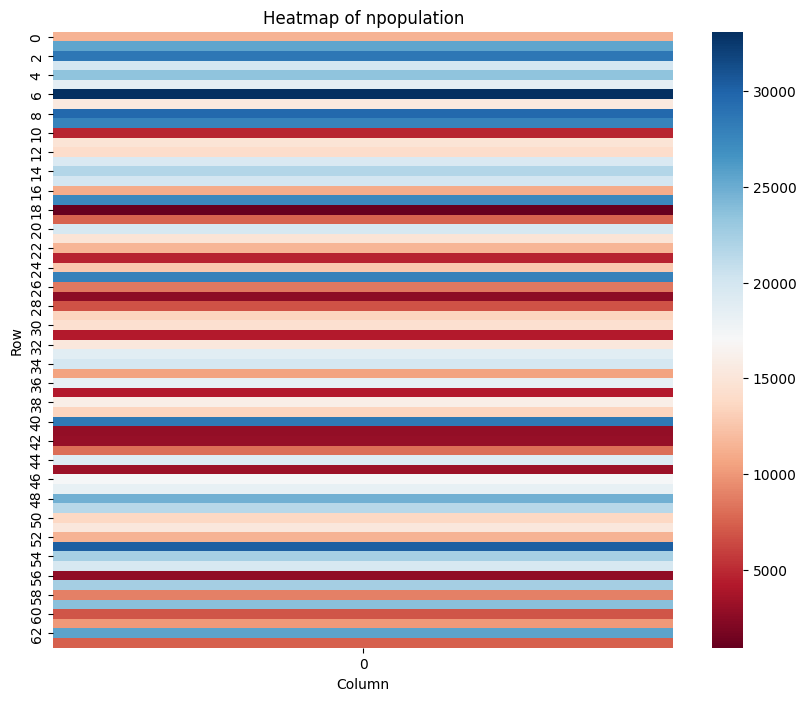

(50, 64, 1)


In [ ]:
# 만들어진 population 출력 (예시로 처음 3개 세대만 출력)
for i in range(3):
    print("Population head", i+1, ":\n", population[i][:5])
    print("Total Sum:", np.sum(population[i]))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
npopulation=np.array(population[0], float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(npopulation, cmap='RdBu', vmin=npopulation.min(), vmax=npopulation.max())
plt.title('Heatmap of npopulation')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

print(population.shape)


In [ ]:
# 샤프 지수 계산 함수
def sharpe_ratio(protfolio):
    # 샤프지수를 어떻게 잘 계산한다 가정
    # 일단은 합으로 계산
    return (np.sum(protfolio * dividends))

In [ ]:
# 100만원을 무작위 투자로 할경우 연평균 배당금
sharpe_ratio(population[6])

203998.81429867758

In [ ]:
# 1번째 세대중 최고배당금
a = np.zeros(64)
for i in range(len(population)):
  b = population[i] * dividends
  if np.sum(a) < np.sum(b):
    a = b
print(a.shape)
print(np.sum(a))

(64, 1)
232900.15058717848


In [ ]:
from tqdm import tqdm  # TQDM 라이브러리 임포트

# 초기 유전 알고리즘 파라미터 설정
population_size = 50
mutation_rate = 0.1
budget = 1000000 #가정
num_generations = 20000

# population 배열 생성
population = np.zeros((population_size, 64, 1))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(64, 1)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol

# 유전 알고리즘

for generation in tqdm(range(num_generations)):
    # 각 염색체의 샤프 지수 계산
    fitness_scores = [sharpe_ratio(weights) for weights in population]

    # 새로운 세대 생성
    new_population = []
    for _ in range(100):
        # 부모 선택 (토너먼트 선택)
        parent1 = random.choice(population)
        parent2 = random.choice(population)

        # 교차 지점 선택
        crossover_point = np.random.randint(0, parent1.shape[0])

        # 부모로부터 자식 생성
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=0)

        # 정규화: 합이 budget이 되도록
        child = child / np.sum(child) * budget

        # 돌연변이
        if random.random() < mutation_rate:
            mutation_point =  np.random.randint(0, parent1.shape[0])
            child[mutation_point] = random.random()
            child /= np.sum(child) * budget  # 정규화



        new_population.append(child)

    population = new_population

# 최적 해 출력
best_solution_index = np.argmax(fitness_scores)
best_solution = population[best_solution_index]
best_sharpe_ratio = fitness_scores[best_solution_index]
print("Optimal Solution head:", best_solution[:5])
print("Optimal Sharpe Ratio:", best_sharpe_ratio)

100%|██████████| 20000/20000 [01:12<00:00, 275.07it/s]

Optimal Solution head: [[1.17374970e-173]
 [5.14499106e-032]
 [5.59210508e-012]
 [0.00000000e+000]
 [6.11783850e-027]]
Optimal Sharpe Ratio: 649128.9477277428


In [ ]:
print(np.array(best_solution, float).shape)
print(np.sum(np.array(best_solution, float)))

(64, 1)
1000000.0


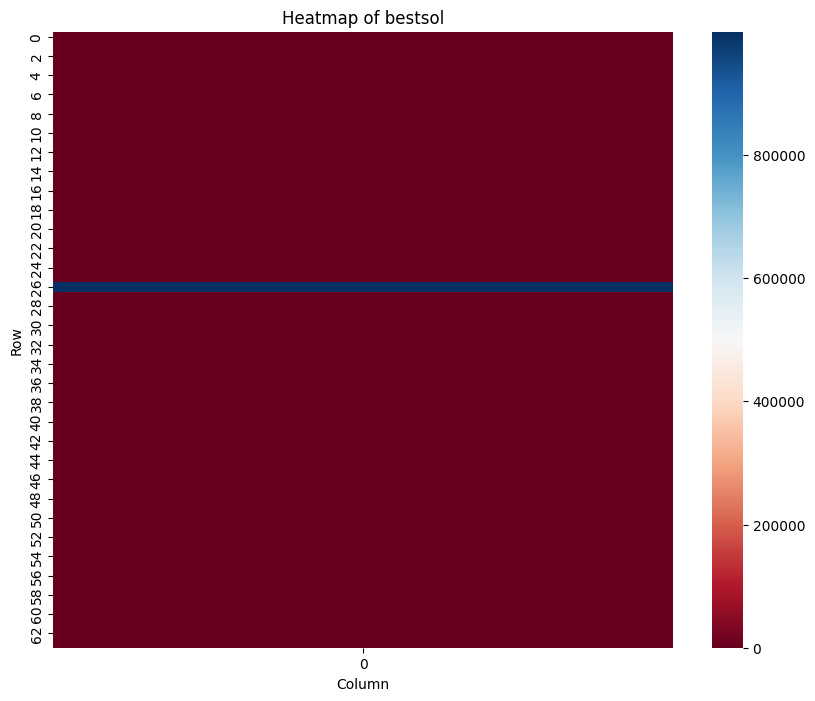

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bestsol=np.array(best_solution, float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(bestsol, cmap='RdBu', vmin=bestsol.min(), vmax=bestsol.max())
plt.title('Heatmap of bestsol')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

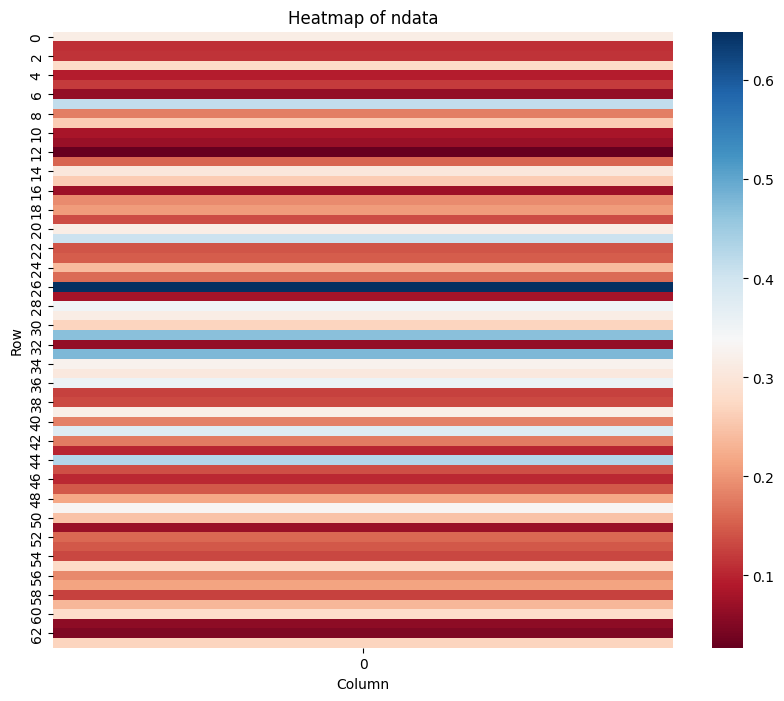

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ndata = np.array(data,float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(ndata, cmap='RdBu', vmin=ndata.min(), vmax=ndata.max())
plt.title('Heatmap of ndata')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()


In [ ]:
pd.DataFrame(dividends).describe()

,0
count,64.000000
mean,0.214778
std,0.125266
min,0.027016
25%,0.124036
50%,0.185081
75%,0.303387
max,0.649129
